# Baseline

In [1]:
!python -m pip install -q ultralytics
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Обучение

In [ ]:
import kaggle_secrets
import wandb

model = ultralytics.YOLO("yolo11s.pt")
wandb.login(anonymous="never", key=kaggle_secrets.UserSecretsClient().get_secret("wandb_key"))
ultralytics.settings.update({"wandb": True})

model.train(
    project="player-tracking",
    name="train8",
    data="../input/ds-yolo/dataset.yaml",
    epochs=20
);

## Метрики

In [2]:
import IPython
import pandas as pd

Метрики итоговой модели (метрики, начинающиеся с `metrics/`, рассчитаны на val выборке):

In [3]:
pd.read_csv("player-tracking/train8/results.csv").iloc[-1].transpose().iloc[2:-3]

train/box_loss          0.56340
train/cls_loss          0.32162
train/dfl_loss          0.83724
metrics/precision(B)    0.90432
metrics/recall(B)       0.79027
metrics/mAP50(B)        0.88941
metrics/mAP50-95(B)     0.60835
val/box_loss            1.11584
val/cls_loss            0.74859
val/dfl_loss            1.09126
Name: 19, dtype: float64

Графики зависимости метрик от эпохи:

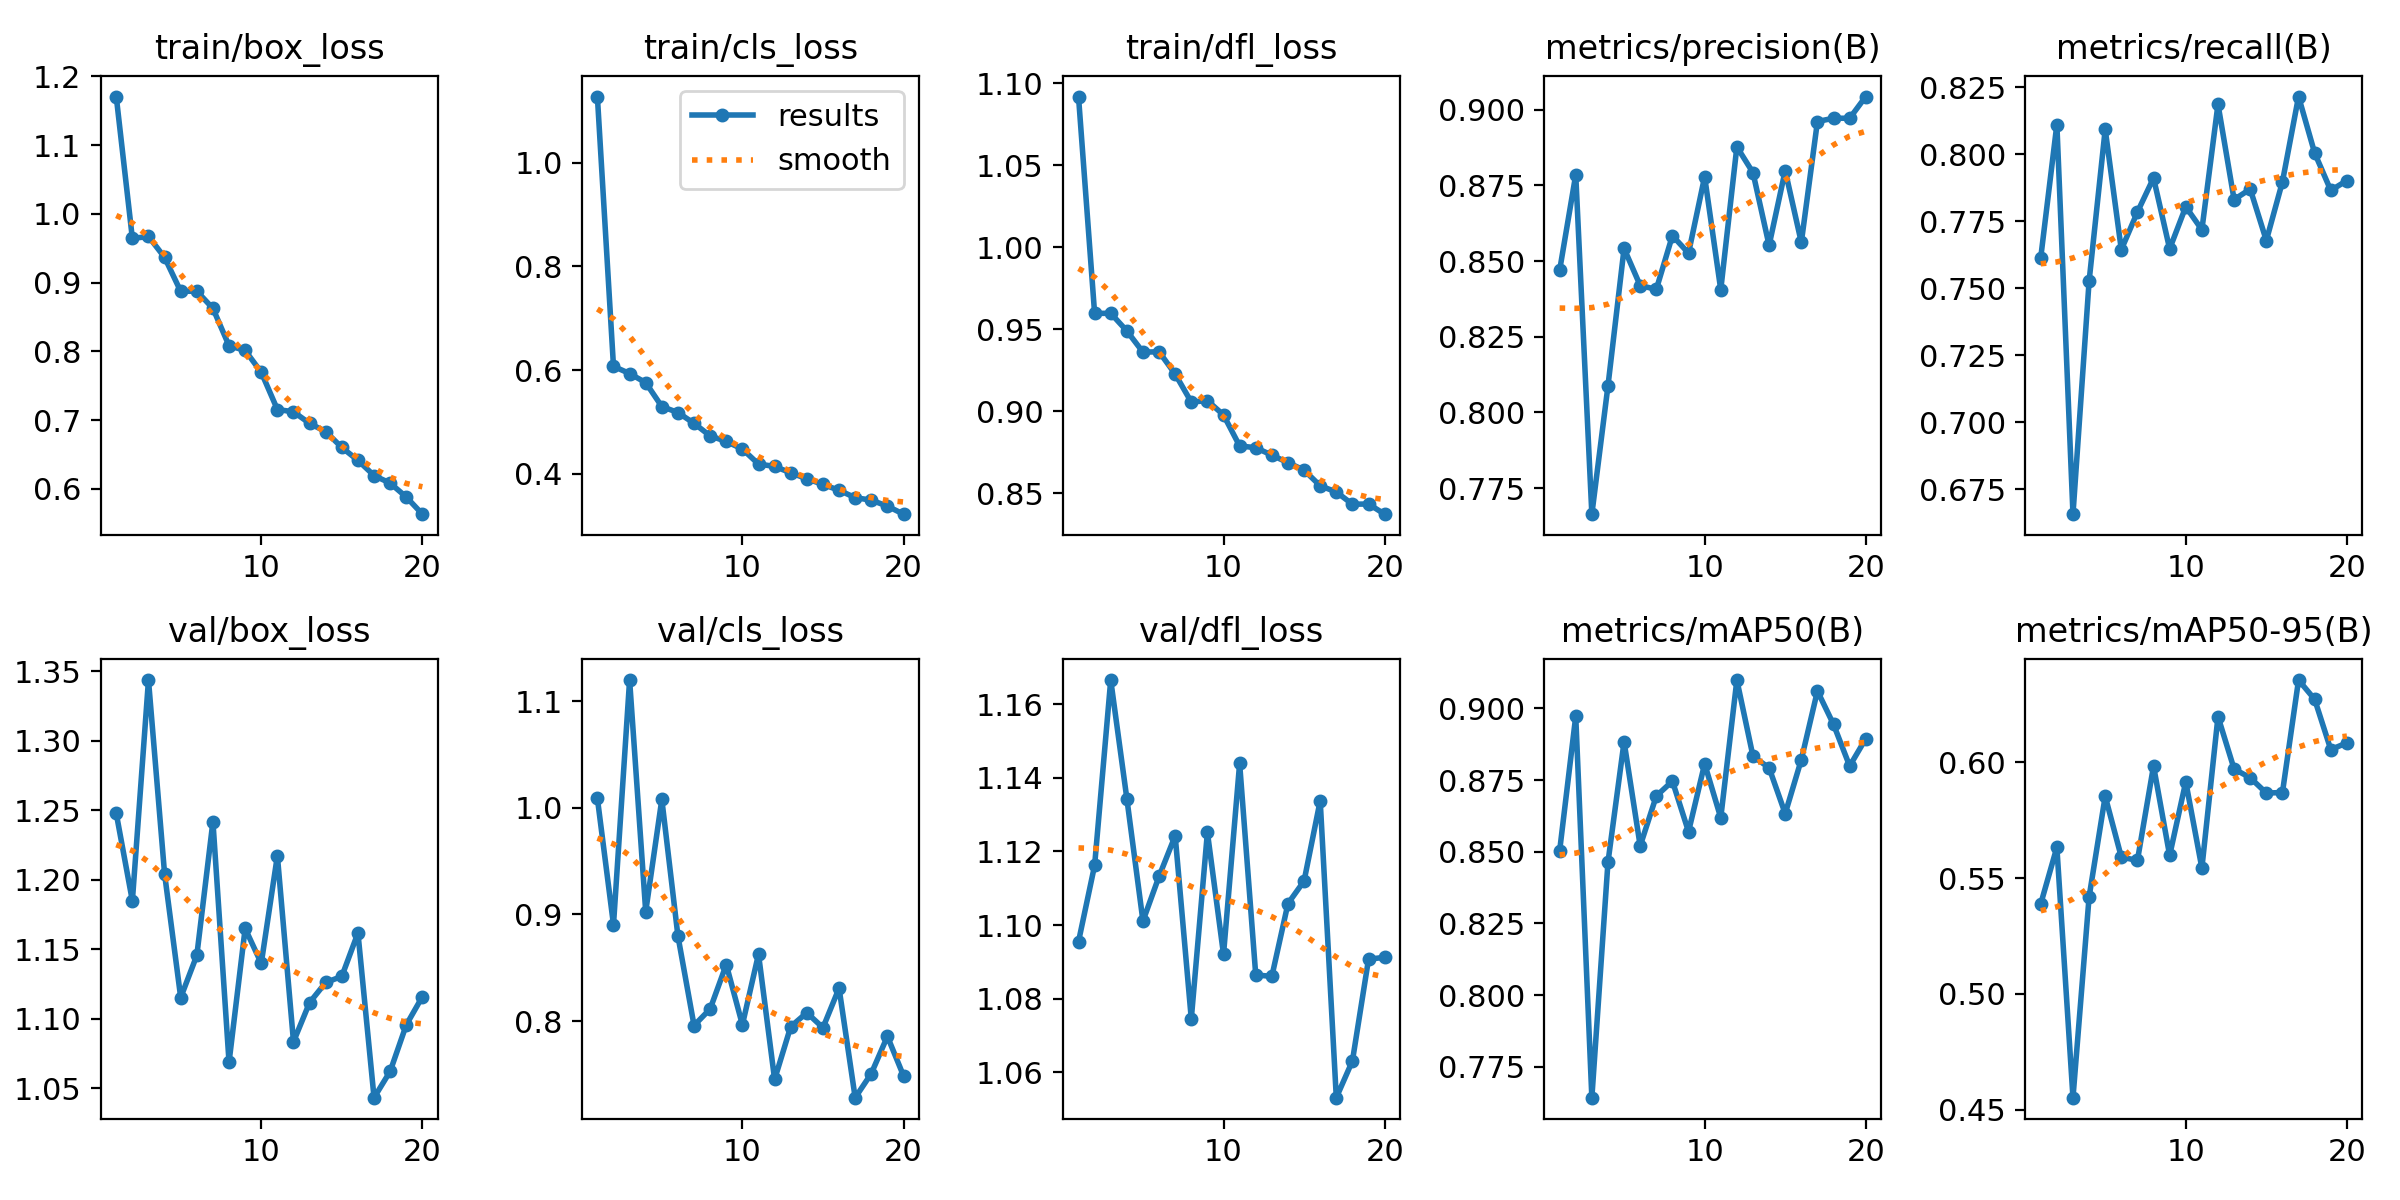

In [4]:
IPython.display.Image("player-tracking/train8/results.png")

PR-кривая:

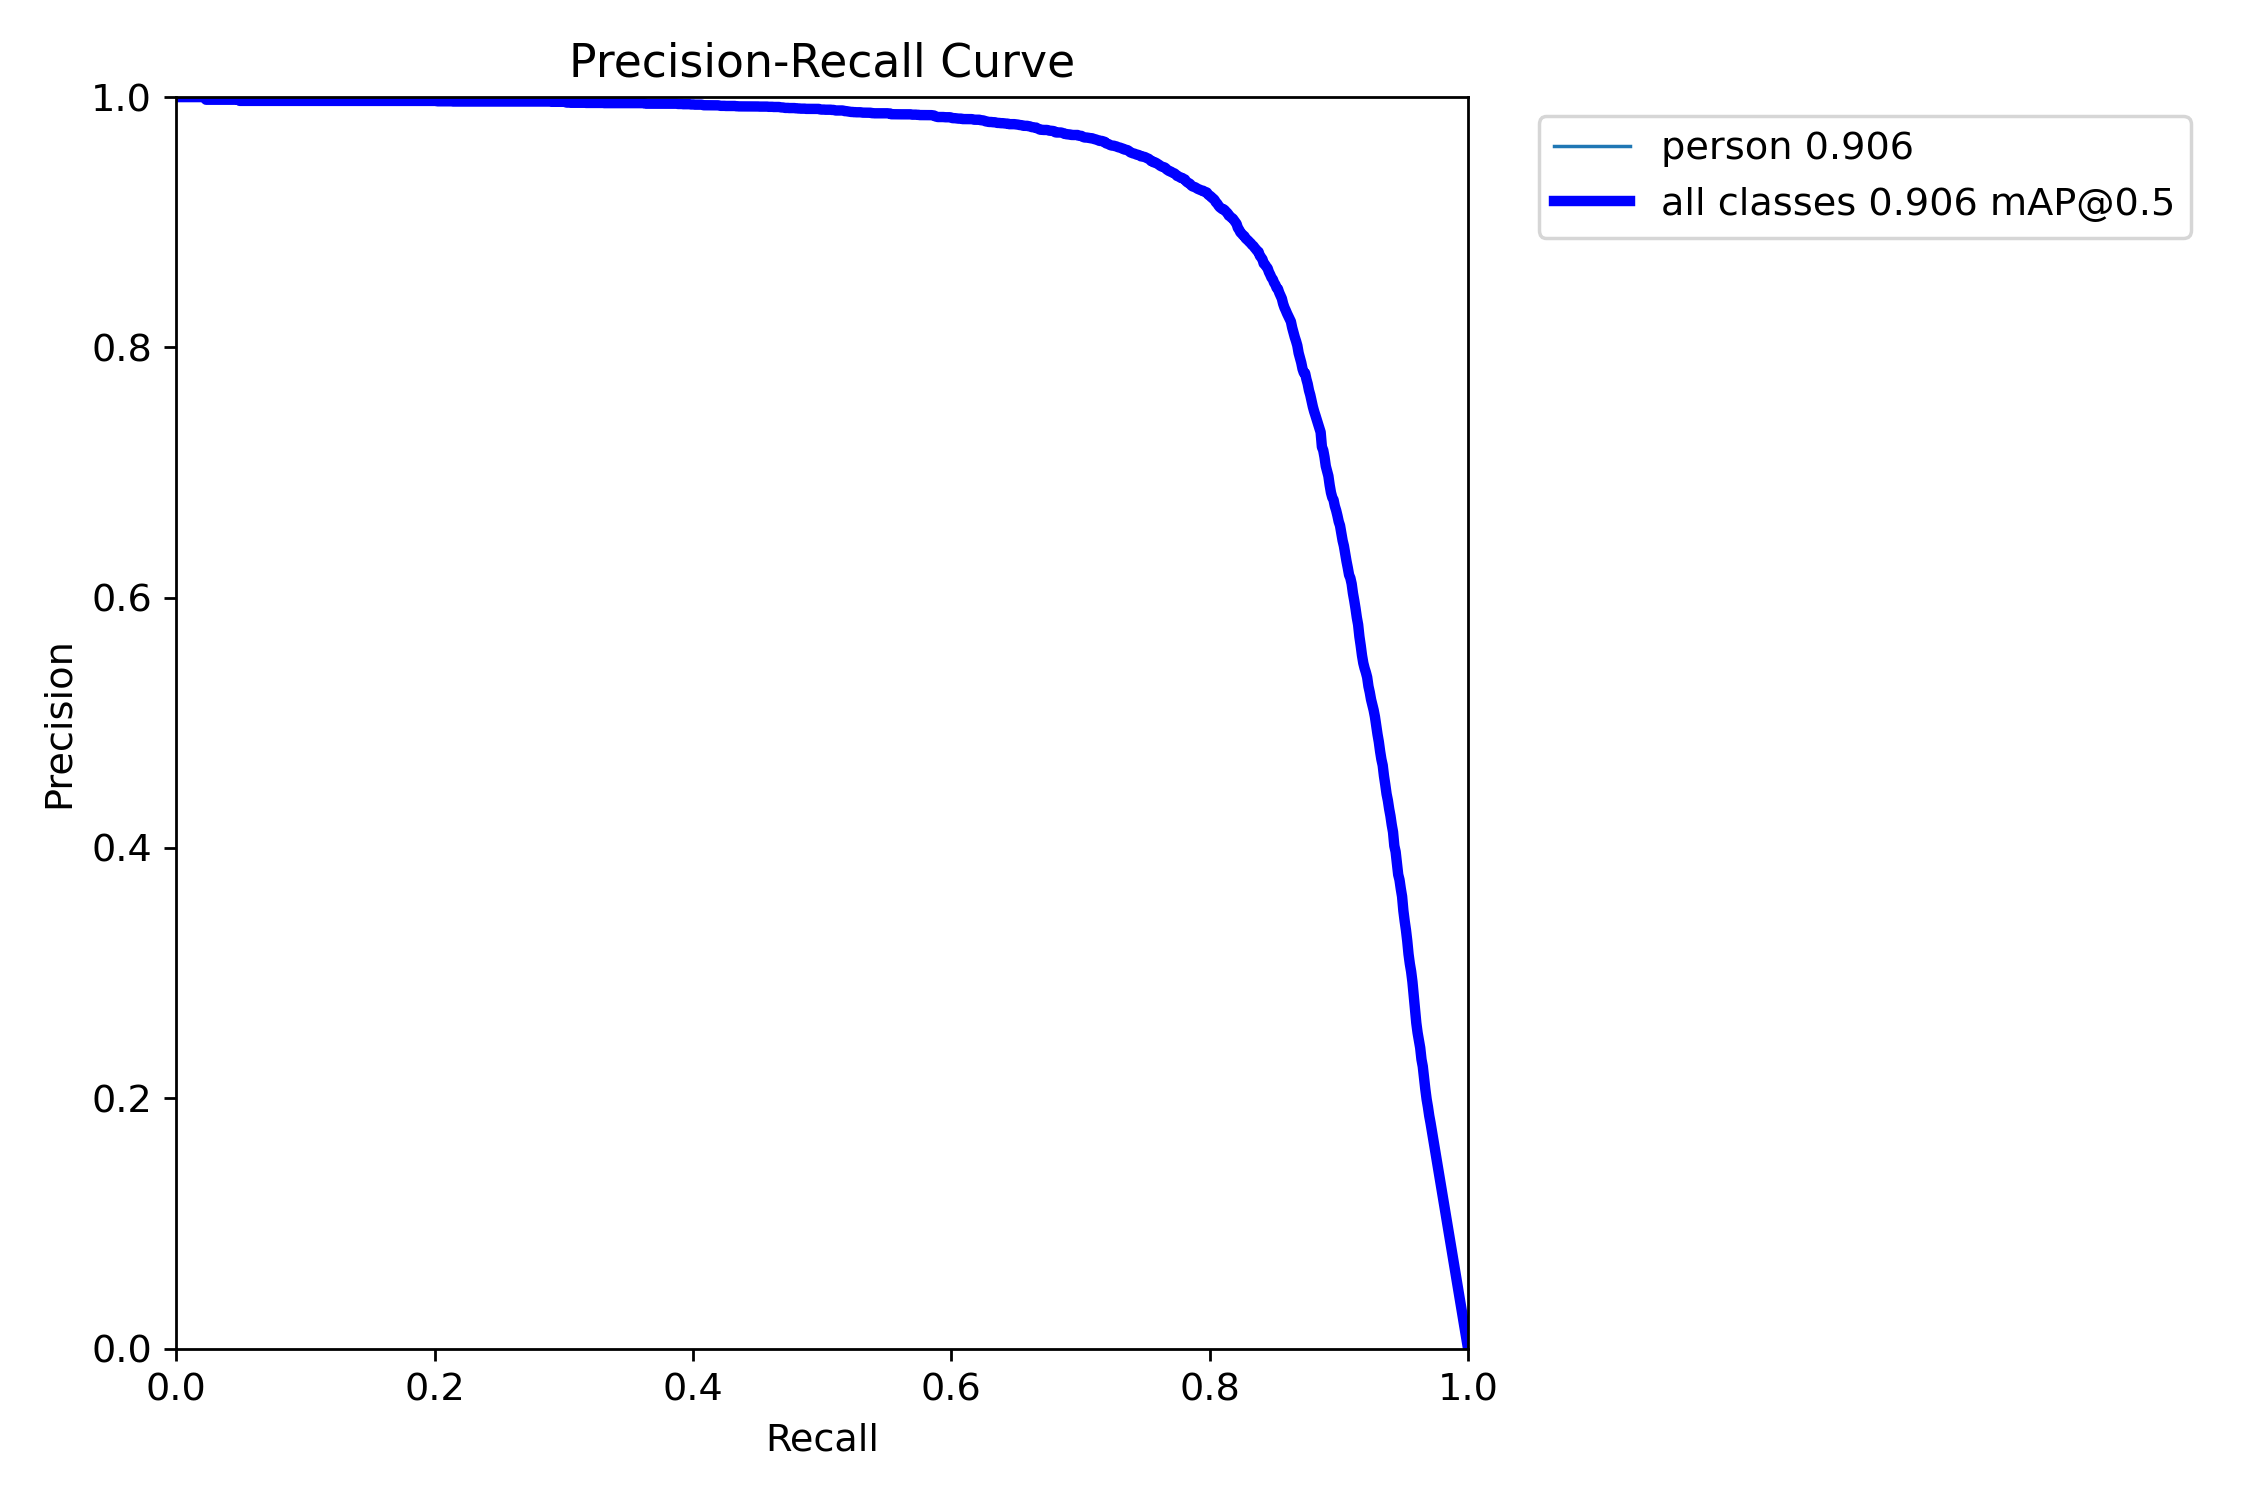

In [5]:
IPython.display.Image("player-tracking/train8/PR_curve.png")

## Пример инференса


image 1/1 /kaggle/working/../input/ds-yolo/images/val/v_00HRwkvvjtQ_c001_img1_000001.jpg: 384x640 6 persons, 88.2ms
Speed: 10.1ms preprocess, 88.2ms inference, 228.7ms postprocess per image at shape (1, 3, 384, 640)


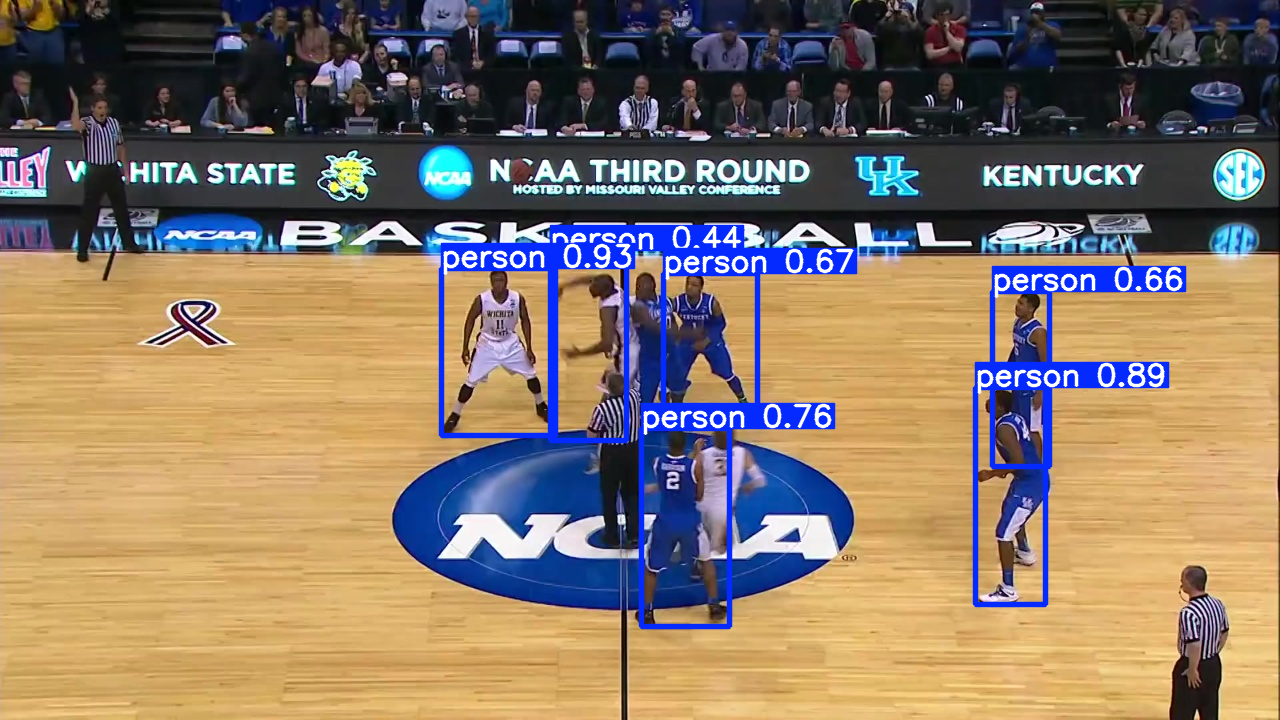

In [6]:
model = ultralytics.YOLO("player-tracking/train8/weights/last.pt")
model("../input/ds-yolo/images/val/v_00HRwkvvjtQ_c001_img1_000001.jpg")[0].show()